In [214]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [215]:
warnings.filterwarnings('ignore')

In [216]:
df=pd.read_csv('ml-100k/u.data',sep='\t',names=["user_id","item_id","rating","timestamp"])
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [217]:
df['item_id'].nunique()

1682

In [218]:
movie=pd.read_csv('ml-100k/u.item',sep='\|',header=None)
movie_title=movie[[0,1]]
movie_title.columns=["item_id","title"]
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [219]:
new=pd.merge(df,movie_title,on="item_id")
new.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [220]:
new.groupby('title').mean()['rating']  #as we take mean of rating 


title
'Til There Was You (1997)                                   2.333333
1-900 (1994)                                                2.600000
101 Dalmatians (1996)                                       2.908257
12 Angry Men (1957)                                         4.344000
187 (1997)                                                  3.024390
2 Days in the Valley (1996)                                 3.225806
20,000 Leagues Under the Sea (1954)                         3.500000
2001: A Space Odyssey (1968)                                3.969112
3 Ninjas: High Noon At Mega Mountain (1998)                 1.000000
39 Steps, The (1935)                                        4.050847
8 1/2 (1963)                                                3.815789
8 Heads in a Duffel Bag (1997)                              3.250000
8 Seconds (1994)                                            3.750000
A Chef in Love (1996)                                       4.125000
Above the Rim (1994)        

In [221]:
new.groupby('title').count()['rating']  # here we take count of ratings

title
'Til There Was You (1997)                                     9
1-900 (1994)                                                  5
101 Dalmatians (1996)                                       109
12 Angry Men (1957)                                         125
187 (1997)                                                   41
2 Days in the Valley (1996)                                  93
20,000 Leagues Under the Sea (1954)                          72
2001: A Space Odyssey (1968)                                259
3 Ninjas: High Noon At Mega Mountain (1998)                   5
39 Steps, The (1935)                                         59
8 1/2 (1963)                                                 38
8 Heads in a Duffel Bag (1997)                                4
8 Seconds (1994)                                              4
A Chef in Love (1996)                                         8
Above the Rim (1994)                                          5
Absolute Power (1997)             

In [222]:
ratings=pd.DataFrame(new.groupby('title').mean()['rating'])
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [223]:
ratings['no. of user rated']=pd.DataFrame(new.groupby('title').count()['rating'])
ratings.head()

,rating,no. of user rated
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [224]:
ratings.sort_values(by='rating',ascending=False)

,rating,no. of user rated
title,,
They Made Me a Criminal (1939),5.000000,1
Marlene Dietrich: Shadow and Light (1996),5.000000,1
"Saint of Fort Washington, The (1993)",5.000000,2
Someone Else's America (1995),5.000000,1
Star Kid (1997),5.000000,3
"Great Day in Harlem, A (1994)",5.000000,1
Aiqing wansui (1994),5.000000,1
Santa with Muscles (1996),5.000000,2
Prefontaine (1997),5.000000,3


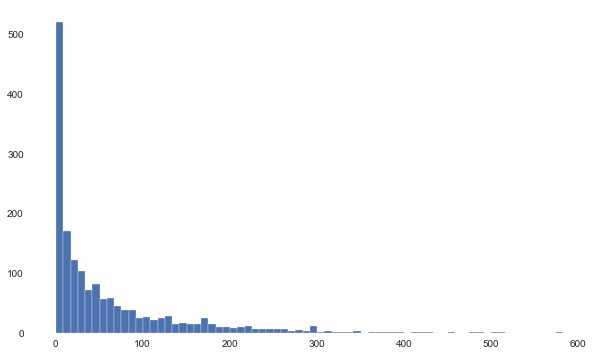

In [225]:
plt.figure(figsize=(10,6))
plt.hist(ratings['no. of user rated'],bins=70)
plt.show()      

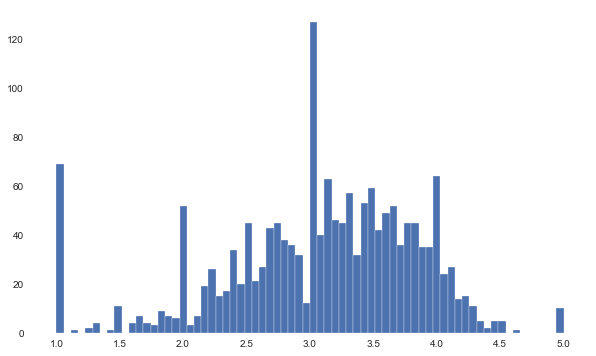

In [226]:
plt.figure(figsize=(10,6))
plt.hist(ratings['rating'],bins=70)
plt.show()     

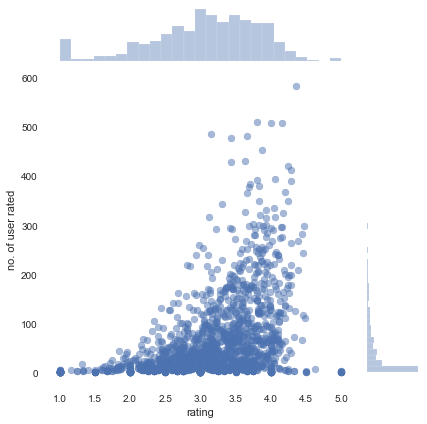

In [227]:
sns.jointplot(x='rating',y='no. of user rated',data=ratings,alpha=0.5) 
#this graph shows that mostly users rated average rating and high rating users are less

In [228]:
new.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [229]:
#Create a map of all user ids with all movie

In [230]:
moviesmat=new.pivot_table(index="user_id",columns="title",values="rating")
moviesmat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
ratings.sort_values(by='no. of user rated',ascending=False)

,rating,no. of user rated
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [232]:
star_wars_rating=moviesmat['Star Wars (1977)']  #store rating of star wars by all user
star_wars_rating.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [233]:
#create a correlation of star wars movies with other movies

In [234]:
similar_to_star=moviesmat.corrwith(star_wars_rating)
corr_starwar=pd.DataFrame(similar_to_star)
corr_starwar.columns=['Correlation']
corr_starwar.dropna(inplace=True)   #drop NaN
corr_starwar.sort_values(by="Correlation",ascending=False).head(10)
#here we see that correlation is 1.0 which is quite impossible as no two movies are get same rated exactly by same no. of users
# so we need to filter our dataframe so we take a reference of minimum 100 user rated tha movie

,Correlation
title,
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Mondo (1996),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0


In [235]:
# so we create datframe by taking reference of minimum 100 user rated tha movie

In [236]:
corr_starwar=corr_starwar.join(ratings['no. of user rated'])
corr_starwar.head(10)

,Correlation,no. of user rated
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


In [237]:
corr_starwar[corr_starwar['no. of user rated']>100].sort_values(by='Correlation',ascending=False).head(10)

,Correlation,no. of user rated
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [238]:
#so here we see that next two movies after star wars are recommended by data which is obvious true
#as next two are the parts of star wars and must be recommended that means our data set is correctly recommended

In [239]:
#let take a genral function to recommend movies to user

In [240]:
def predict(movie_name):
    
    movie_name_rating=moviesmat[movie_name]
    
    similar_to_movie=moviesmat.corrwith(movie_name_rating)
    
    corr_movie=pd.DataFrame(similar_to_movie)
    
    corr_movie.columns=['Correlation']
    
    corr_movie.dropna(inplace=True)   #drop NaN
    
    corr_movie=corr_movie.join(ratings['no. of user rated'])
    
    prediction=corr_movie[corr_movie['no. of user rated']>100].sort_values(by='Correlation',ascending=False).head(10)
    
    return prediction
    

In [213]:
pre=predict('Titanic (1997)')
pre.head()

,Correlation,no. of user rated
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208


In [241]:
# thus movie recommended search for titanic is show below it 

In [242]:
#_______ This is my project on Movie Recommendation System______________